In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Purpose: Connects your Google Drive to the Colab environment so you can read and write files (datasets, models, etc.) directly from your Drive.

The dataset used in this project is too large to be uploaded directly to Colab due to storage and session limitations.
To handle this, we have connected Colab to Google Drive where the dataset is stored.
The dataset is located under the folder:
SafeRoad/References & Links for Datasets in Drive.
This setup allows seamless access to the dataset and also enables saving trained models directly to Drive for future use.

In [2]:
import os
print("Files in your References & Links for Datasets folder:")
!ls -la "/content/drive/MyDrive/SafeRoad/References & Links for Datasets/"

Files in your References & Links for Datasets folder:
total 4823937
-rw------- 1 root root  628035458 Jul 22 17:16 archive.zip
-rw------- 1 root root     491359 Jul 22 16:43 driver_imgs_list.csv
drwx------ 2 root root       4096 Jul 22 17:28 my_test_images
-rw------- 1 root root    4298269 Jul 22 16:42 sample_submission.csv
-rw------- 1 root root 4306881343 Jul 22 16:41 state-farm-distracted-driver-detection.zip


Lists all files in the folder References & Links for Datasets inside your Google Drive.
This is just a sanity check—so you know what dataset files (e.g., state-farm-distracted-driver-detection.zip) are present.


In [3]:
import glob

# Updated paths for your folder structure
DATASET_PATH = "/content/drive/MyDrive/SafeRoad/References & Links for Datasets"
MODEL_SAVE_PATH = "/content/drive/MyDrive/SafeRoad/Code/Saved Models"

# Create model save directory if it doesn't exist
os.makedirs(MODEL_SAVE_PATH, exist_ok=True)
print(f"Model save path: {MODEL_SAVE_PATH}")

possible_zip_paths = [
    f"{DATASET_PATH}/state-farm-distracted-driver-detection.zip",
    f"{DATASET_PATH}/*.zip"
]

zip_file_path = None
for path in possible_zip_paths:
    files = glob.glob(path)
    if files:
        # Find the state-farm zip specifically
        for file in files:
            if 'state-farm' in file:
                zip_file_path = file
                break
        if not zip_file_path:
            zip_file_path = files[0]
        print(f"Found zip file: {zip_file_path}")
        break

if not zip_file_path:
    print("❌ No zip file found!")
    print("Please make sure the zip file is in the References & Links for Datasets folder")
    print("\nFiles in folder:")
    !ls "/content/drive/MyDrive/SafeRoad/References & Links for Datasets/"
else:
    print(f"✓ Using zip file: {zip_file_path}")

Model save path: /content/drive/MyDrive/SafeRoad/Code/Saved Models
Found zip file: /content/drive/MyDrive/SafeRoad/References & Links for Datasets/state-farm-distracted-driver-detection.zip
✓ Using zip file: /content/drive/MyDrive/SafeRoad/References & Links for Datasets/state-farm-distracted-driver-detection.zip


Defines the paths where your dataset is stored and where trained models will be saved.

Checks if a dataset zip file is present in the folder.

Prepares MODEL_SAVE_PATH by creating the directory if it doesn’t exist.

In [4]:
if zip_file_path:
    # Check if already extracted
    if os.path.exists('/content/imgs') or os.path.exists('/content/state-farm-distracted-driver-detection'):
        print("✓ Dataset appears to be already extracted. Skipping extraction.")
        if os.path.exists('/content/state-farm-distracted-driver-detection'):
            BASE_PATH = '/content/state-farm-distracted-driver-detection'
        elif os.path.exists('/content/imgs'):
            BASE_PATH = '/content'
    else:
        print(f"\nExtracting {zip_file_path}...")
        # Use -o flag to force overwrite without prompting
        !unzip -o -q "{zip_file_path}" -d "/content/"
        print("✓ Extraction complete!")

    # Check what was extracted
    print("\nExtracted contents:")
    !ls -la /content/

    # Find the dataset folder
    if os.path.exists('/content/state-farm-distracted-driver-detection'):
        BASE_PATH = '/content/state-farm-distracted-driver-detection'
    elif os.path.exists('/content/imgs'):
        BASE_PATH = '/content'
    else:
        # List all directories to find the right one
        print("\nSearching for dataset folder...")
        !find /content -name "driver_imgs_list.csv" -type f 2>/dev/null


Extracting /content/drive/MyDrive/SafeRoad/References & Links for Datasets/state-farm-distracted-driver-detection.zip...
✓ Extraction complete!

Extracted contents:
total 24
drwxr-xr-x 1 root root 4096 Jul 27 14:48 .
drwxr-xr-x 1 root root 4096 Jul 27 14:46 ..
drwxr-xr-x 4 root root 4096 Jul 24 13:37 .config
drwx------ 5 root root 4096 Jul 27 14:48 drive
drwxr-xr-x 1 root root 4096 Jul 24 13:37 sample_data
drwxrwxrwx 3 root root 4096 Jul 11 06:25 state-farm-distracted-driver-detection


Extracts the dataset zip file into /content/.

Skips extraction if the dataset is already present.

Identifies the base dataset folder (e.g., state-farm-distracted-driver-detection).

In [5]:
import pandas as pd

# First try to use the CSV from your folder directly if it exists
CSV_IN_FOLDER = f"{DATASET_PATH}/driver_imgs_list.csv"
if os.path.exists(CSV_IN_FOLDER):
    CSV_PATH = CSV_IN_FOLDER
    print(f"✓ Using CSV from your folder: {CSV_PATH}")
else:
    # Try to find the CSV files in extracted content
    csv_locations = !find /content -name "driver_imgs_list.csv" -type f 2>/dev/null
    if csv_locations:
        csv_path = csv_locations[0]
        BASE_PATH = os.path.dirname(csv_path)
        CSV_PATH = csv_path
        print(f"✓ Found dataset at: {BASE_PATH}")
    else:
        print("❌ Could not find driver_imgs_list.csv")
        print("Please check your zip file structure")

# Check structure
if 'BASE_PATH' in locals():
    print(f"\nDataset structure at {BASE_PATH}:")
    !ls -la "{BASE_PATH}"

    # Check imgs folder
    if os.path.exists(f"{BASE_PATH}/imgs"):
        print("\nImages folder:")
        !ls -la "{BASE_PATH}/imgs/"

✓ Using CSV from your folder: /content/drive/MyDrive/SafeRoad/References & Links for Datasets/driver_imgs_list.csv

Dataset structure at /content/state-farm-distracted-driver-detection:
total 12
drwxrwxrwx 3 root root 4096 Jul 11 06:25 .
drwxr-xr-x 1 root root 4096 Jul 27 14:48 ..
drwxrwxrwx 4 root root 4096 Jul  8 18:07 imgs

Images folder:
total 2660
drwxrwxrwx  4 root root    4096 Jul  8 18:07 .
drwxrwxrwx  3 root root    4096 Jul 11 06:25 ..
drwxrwxrwx  2 root root 2707456 Jul  8 18:07 test
drwxrwxrwx 12 root root    4096 Jul  8 18:11 train


Finds driver_imgs_list.csv (the CSV with image-to-class mappings).

Confirms the correct dataset structure (like the imgs folder).

Lists the content of the dataset to ensure everything’s in place.

In [6]:
!pip install opencv-python
!pip install scikit-learn
!pip install seaborn
!pip install tensorflow
!pip install torch torchvision pandas scikit-learn tqdm matplotlib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.6 MB/s eta 0:00:00


Installs all the Python libraries you need for the project:

opencv-python (image handling),

scikit-learn (train/test splitting),

seaborn (plotting),

tensorflow (optional deep learning library),

torch + torchvision (main PyTorch framework).

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import json
from datetime import datetime

Loads all the necessary Python libraries (PyTorch, Pandas, NumPy, etc.).

Sets configuration parameters: batch size, image size, number of epochs, patience for early stopping, etc.

Prints the dataset and hardware (CPU/GPU) info.


In [8]:
if 'BASE_PATH' in locals():
    IMG_DIR = os.path.join(BASE_PATH, "imgs", "train")
    TEST_IMG_DIR = os.path.join(BASE_PATH, "imgs", "test")
else:
    # If BASE_PATH not set, assume data is directly in your folder
    IMG_DIR = os.path.join(DATASET_PATH, "imgs", "train")
    TEST_IMG_DIR = os.path.join(DATASET_PATH, "imgs", "test")

BATCH_SIZE = 32
IMG_SIZE = 224
EPOCHS = 20
patience = 4
best_val_acc = 0.0
epochs_no_improve = 0
NUM_WORKERS = 2 if torch.cuda.is_available() else 0
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using CSV path: {CSV_PATH}")
print(f"Using image directory: {IMG_DIR}")
print(f"Using test image directory: {TEST_IMG_DIR}")
print(f"Using device: {DEVICE}")

Using CSV path: /content/drive/MyDrive/SafeRoad/References & Links for Datasets/driver_imgs_list.csv
Using image directory: /content/state-farm-distracted-driver-detection/imgs/train
Using test image directory: /content/state-farm-distracted-driver-detection/imgs/test
Using device: cuda


Loads the CSV file into a DataFrame.

Creates a new column label (converting c0 → 0, c1 → 1, etc.).

Creates full image paths for each row in the CSV.

Splits the dataset into training and validation sets (90% / 10%).



In [9]:
df = pd.read_csv(CSV_PATH)
print(f"CSV loaded with {len(df)} rows")
print("Sample data:")
print(df.head())

# Create label from classname (c0 → 0, c1 → 1, etc.)
df['label'] = df['classname'].apply(lambda x: int(x[1:]))

# Create full image paths
df['img_path'] = df.apply(lambda row: os.path.join(IMG_DIR, row['classname'], row['img']), axis=1)

# Verify some image paths exist
print("\nVerifying image paths...")
sample_paths = df['img_path'].head()
for i, path in enumerate(sample_paths):
    exists = os.path.exists(path)
    print(f"Path {i+1}: {exists} - {path}")

# Train/Val Split
train_df, val_df = train_test_split(df, test_size=0.1, stratify=df['label'], random_state=42)
print(f"\nTrain size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")

CSV loaded with 22424 rows
Sample data:
  subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg

Verifying image paths...
Path 1: True - /content/state-farm-distracted-driver-detection/imgs/train/c0/img_44733.jpg
Path 2: True - /content/state-farm-distracted-driver-detection/imgs/train/c0/img_72999.jpg
Path 3: True - /content/state-farm-distracted-driver-detection/imgs/train/c0/img_25094.jpg
Path 4: True - /content/state-farm-distracted-driver-detection/imgs/train/c0/img_69092.jpg
Path 5: True - /content/state-farm-distracted-driver-detection/imgs/train/c0/img_92629.jpg

Train size: 20181
Validation size: 2243


Defines a DriverDataset class (a PyTorch Dataset) that:

Loads images and their labels on-the-fly.

Applies transformations like resizing or normalization.

Handles missing or broken image files gracefully.

In [10]:
class DriverDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, "img_path"]
        label = self.df.loc[idx, "label"]

        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            # Return a dummy image if loading fails
            image = Image.new('RGB', (224, 224), color='black')

        if self.transform:
            image = self.transform(image)
        return image, label

Sets up image preprocessing pipelines (augmentations):

transform_train (with random cropping, flipping, color jitter).

transform_val (just resize and normalize).

In [11]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

Wraps the dataset in DataLoader objects for efficient batch processing during training and validation.

Uses the transformations defined earlier.

In [12]:
train_ds = DriverDataset(train_df, transform_train)
val_ds = DriverDataset(val_df, transform_val)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

print("DataLoaders created successfully!")

DataLoaders created successfully!


Loads a pre-trained VGG16 model.

Replaces the final layer with one that outputs 10 classes (for c0 to c9).

Moves the model to GPU (cuda) if available.

Sets up loss function (cross-entropy) and optimizer (Adam).

In [13]:
model = models.vgg16(pretrained=True)
model.classifier[6] = nn.Linear(4096, 10)  # 10 classes (c0–c9)
model = model.to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

print("Model initialized!")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:10<00:00, 53.5MB/s]


Model initialized!


model = models.vgg16(pretrained=True)
model.classifier[6] = nn.Linear(4096, 10)  # 10 classes (c0–c9)
model = model.to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

print("Model initialized!")

In [14]:
print("Starting training...")
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# Define class names for distracted driving
class_names = {
    0: "Normal Driving",
    1: "Texting - Right",
    2: "Talking Phone - Right",
    3: "Texting - Left",
    4: "Talking Phone - Left",
    5: "Operating Radio",
    6: "Drinking",
    7: "Reaching Behind",
    8: "Hair & Makeup",
    9: "Talking to Passenger"
}

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * imgs.size(0)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    train_acc = 100. * correct / total
    train_losses.append(epoch_loss)
    train_accs.append(train_acc)

    # Validation
    model.eval()
    val_running_loss = 0.0
    correct, total = 0, 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * imgs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss = val_running_loss / len(val_loader.dataset)
    val_acc = 100. * correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}: Train Loss={epoch_loss:.4f} | Train Acc={train_acc:.2f}% | Val Loss={val_loss:.4f} | Val Acc={val_acc:.2f}%")

    # Save best model with comprehensive checkpoint
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        epochs_no_improve = 0

        # Create comprehensive checkpoint
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_loss': epoch_loss,
            'train_acc': train_acc,
            'val_loss': val_loss,
            'val_acc': val_acc,
            'class_names': class_names,
            'num_classes': 10,
            'model_architecture': 'VGG16',
            'image_size': IMG_SIZE,
            'normalization_mean': [0.485, 0.456, 0.406],
            'normalization_std': [0.229, 0.224, 0.225],
            'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }

        # Save to temporary location
        temp_path = "distracted_driver_best_model.pth"
        torch.save(checkpoint, temp_path)

        # Save to Google Drive
        drive_model_path = os.path.join(MODEL_SAVE_PATH, "distracted_driver_vgg16_best.pth")
        torch.save(checkpoint, drive_model_path)

        print(f"✓ Best model saved to: {drive_model_path}")

        # Also save just the model weights for easier loading
        weights_path = os.path.join(MODEL_SAVE_PATH, "distracted_driver_vgg16_weights.pth")
        torch.save(model.state_dict(), weights_path)
        print(f"✓ Model weights saved to: {weights_path}")

    else:
        epochs_no_improve += 1
        print(f"No improvement for {epochs_no_improve} epoch(s).")
        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch+1}. Best Val Acc: {best_val_acc:.2f}%")
            break

print("Training finished!")

Starting training...


Epoch 1/20: 100%|██████████| 631/631 [05:13<00:00,  2.01it/s]


Epoch 1: Train Loss=0.4680 | Train Acc=84.36% | Val Loss=0.1302 | Val Acc=96.34%
✓ Best model saved to: /content/drive/MyDrive/SafeRoad/Code/Saved Models/distracted_driver_vgg16_best.pth
✓ Model weights saved to: /content/drive/MyDrive/SafeRoad/Code/Saved Models/distracted_driver_vgg16_weights.pth


Epoch 2/20: 100%|██████████| 631/631 [05:17<00:00,  1.99it/s]


Epoch 2: Train Loss=0.0873 | Train Acc=97.45% | Val Loss=0.0515 | Val Acc=98.71%
✓ Best model saved to: /content/drive/MyDrive/SafeRoad/Code/Saved Models/distracted_driver_vgg16_best.pth
✓ Model weights saved to: /content/drive/MyDrive/SafeRoad/Code/Saved Models/distracted_driver_vgg16_weights.pth


Epoch 3/20: 100%|██████████| 631/631 [05:18<00:00,  1.98it/s]


Epoch 3: Train Loss=0.0567 | Train Acc=98.42% | Val Loss=0.0631 | Val Acc=98.48%
No improvement for 1 epoch(s).


Epoch 4/20: 100%|██████████| 631/631 [05:09<00:00,  2.04it/s]


Epoch 4: Train Loss=0.0467 | Train Acc=98.80% | Val Loss=0.0712 | Val Acc=98.26%
No improvement for 2 epoch(s).


Epoch 5/20: 100%|██████████| 631/631 [05:08<00:00,  2.05it/s]


Epoch 5: Train Loss=0.0430 | Train Acc=98.87% | Val Loss=0.0534 | Val Acc=98.80%
✓ Best model saved to: /content/drive/MyDrive/SafeRoad/Code/Saved Models/distracted_driver_vgg16_best.pth
✓ Model weights saved to: /content/drive/MyDrive/SafeRoad/Code/Saved Models/distracted_driver_vgg16_weights.pth


Epoch 6/20: 100%|██████████| 631/631 [05:33<00:00,  1.89it/s]


Epoch 6: Train Loss=0.0372 | Train Acc=99.07% | Val Loss=0.0570 | Val Acc=98.26%
No improvement for 1 epoch(s).


Epoch 7/20: 100%|██████████| 631/631 [05:07<00:00,  2.05it/s]


Epoch 7: Train Loss=0.0401 | Train Acc=98.97% | Val Loss=0.0388 | Val Acc=99.15%
✓ Best model saved to: /content/drive/MyDrive/SafeRoad/Code/Saved Models/distracted_driver_vgg16_best.pth
✓ Model weights saved to: /content/drive/MyDrive/SafeRoad/Code/Saved Models/distracted_driver_vgg16_weights.pth


Epoch 8/20: 100%|██████████| 631/631 [05:34<00:00,  1.89it/s]


Epoch 8: Train Loss=0.0279 | Train Acc=99.28% | Val Loss=0.0477 | Val Acc=99.33%
✓ Best model saved to: /content/drive/MyDrive/SafeRoad/Code/Saved Models/distracted_driver_vgg16_best.pth
✓ Model weights saved to: /content/drive/MyDrive/SafeRoad/Code/Saved Models/distracted_driver_vgg16_weights.pth


Epoch 9/20: 100%|██████████| 631/631 [05:30<00:00,  1.91it/s]


Epoch 9: Train Loss=0.0271 | Train Acc=99.22% | Val Loss=0.0316 | Val Acc=99.38%
✓ Best model saved to: /content/drive/MyDrive/SafeRoad/Code/Saved Models/distracted_driver_vgg16_best.pth
✓ Model weights saved to: /content/drive/MyDrive/SafeRoad/Code/Saved Models/distracted_driver_vgg16_weights.pth


Epoch 10/20: 100%|██████████| 631/631 [05:30<00:00,  1.91it/s]


Epoch 10: Train Loss=0.0275 | Train Acc=99.23% | Val Loss=0.0532 | Val Acc=98.93%
No improvement for 1 epoch(s).


Epoch 11/20: 100%|██████████| 631/631 [05:06<00:00,  2.06it/s]


Epoch 11: Train Loss=0.0167 | Train Acc=99.59% | Val Loss=0.1551 | Val Acc=99.60%
✓ Best model saved to: /content/drive/MyDrive/SafeRoad/Code/Saved Models/distracted_driver_vgg16_best.pth
✓ Model weights saved to: /content/drive/MyDrive/SafeRoad/Code/Saved Models/distracted_driver_vgg16_weights.pth


Epoch 12/20: 100%|██████████| 631/631 [05:30<00:00,  1.91it/s]


Epoch 12: Train Loss=0.0384 | Train Acc=98.97% | Val Loss=0.1043 | Val Acc=97.01%
No improvement for 1 epoch(s).


Epoch 13/20: 100%|██████████| 631/631 [05:06<00:00,  2.06it/s]


Epoch 13: Train Loss=0.0209 | Train Acc=99.41% | Val Loss=0.0377 | Val Acc=99.29%
No improvement for 2 epoch(s).


Epoch 14/20: 100%|██████████| 631/631 [05:06<00:00,  2.06it/s]


Epoch 14: Train Loss=0.0193 | Train Acc=99.56% | Val Loss=0.0353 | Val Acc=99.42%
No improvement for 3 epoch(s).


Epoch 15/20: 100%|██████████| 631/631 [05:04<00:00,  2.07it/s]


Epoch 15: Train Loss=0.0179 | Train Acc=99.54% | Val Loss=0.0335 | Val Acc=99.29%
No improvement for 4 epoch(s).
Early stopping at epoch 15. Best Val Acc: 99.60%
Training finished!


Trains the model over multiple epochs.

Tracks training and validation accuracy and loss.

Saves the best model whenever validation accuracy improves.

Implements early stopping if the model stops improving for a set number of epochs.



In [15]:
final_checkpoint = {
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_loss': epoch_loss,
    'train_acc': train_acc,
    'val_loss': val_loss,
    'val_acc': val_acc,
    'best_val_acc': best_val_acc,
    'class_names': class_names,
    'num_classes': 10,
    'model_architecture': 'VGG16',
    'image_size': IMG_SIZE,
    'normalization_mean': [0.485, 0.456, 0.406],
    'normalization_std': [0.229, 0.224, 0.225],
    'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'training_history': {
        'train_losses': train_losses,
        'train_accs': train_accs,
        'val_losses': val_losses,
        'val_accs': val_accs
    }
}

final_model_path = os.path.join(MODEL_SAVE_PATH, "distracted_driver_vgg16_final.pth")
torch.save(final_checkpoint, final_model_path)
print(f"Final model saved to: {final_model_path}")

# Save training configuration
config = {
    'dataset_path': DATASET_PATH,
    'model_save_path': MODEL_SAVE_PATH,
    'img_dir': IMG_DIR,
    'test_img_dir': TEST_IMG_DIR,
    'batch_size': BATCH_SIZE,
    'img_size': IMG_SIZE,
    'epochs_trained': epoch + 1,
    'max_epochs': EPOCHS,
    'patience': patience,
    'num_workers': NUM_WORKERS,
    'device': DEVICE,
    'train_size': len(train_df),
    'val_size': len(val_df),
    'best_val_acc': best_val_acc,
    'class_names': class_names
}

config_path = os.path.join(MODEL_SAVE_PATH, "distracted_driver_config.json")
with open(config_path, 'w') as f:
    json.dump(config, f, indent=4)
print(f"Training configuration saved to: {config_path}")

Final model saved to: /content/drive/MyDrive/SafeRoad/Code/Saved Models/distracted_driver_vgg16_final.pth
Training configuration saved to: /content/drive/MyDrive/SafeRoad/Code/Saved Models/distracted_driver_config.json


Saves the final version of the model and all training stats (losses, accuracies, best validation accuracy) as a checkpoint.

Stores configuration info in a JSON file.


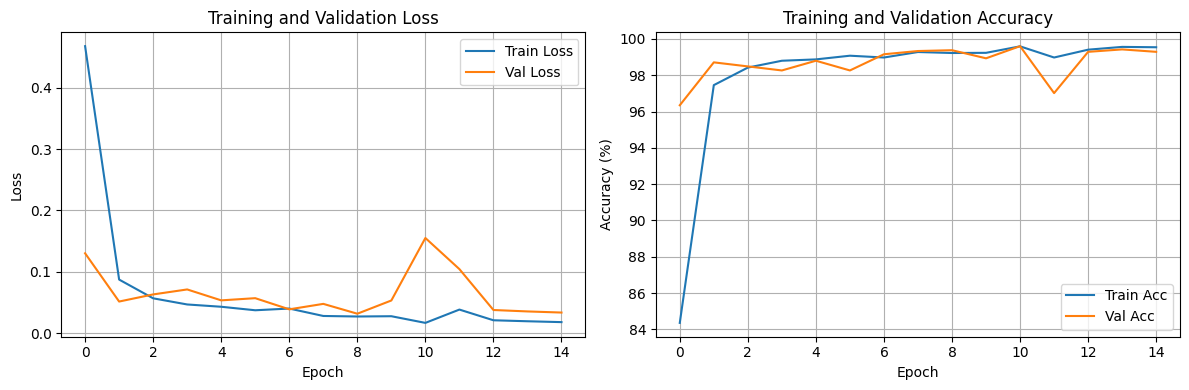

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig(os.path.join(MODEL_SAVE_PATH, 'training_history.png'))
plt.show()

Plots the loss and accuracy curves for both training and validation sets.

Saves the plot (training_history.png) for future reference.

In [17]:
model.eval()
correct, total = 0, 0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        # Per-class accuracy
        c = (preds == labels).squeeze()
        for i in range(labels.size(0)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

overall_val_acc = correct / total
print(f"\nFinal Validation Accuracy: {overall_val_acc:.4f}")

# Print per-class accuracy
print("\nPer-class accuracy:")
for i in range(10):
    if class_total[i] > 0:
        accuracy = 100 * class_correct[i] / class_total[i]
        print(f"Class {i} ({class_names[i]}): {accuracy:.2f}%")


Final Validation Accuracy: 0.9929

Per-class accuracy:
Class 0 (Normal Driving): 100.00%
Class 1 (Texting - Right): 100.00%
Class 2 (Talking Phone - Right): 99.57%
Class 3 (Texting - Left): 100.00%
Class 4 (Talking Phone - Left): 100.00%
Class 5 (Operating Radio): 100.00%
Class 6 (Drinking): 100.00%
Class 7 (Reaching Behind): 99.50%
Class 8 (Hair & Makeup): 95.29%
Class 9 (Talking to Passenger): 97.65%


Evaluates the final trained model on the validation set.

Prints overall accuracy and per-class accuracy.

In [18]:
class TestDriverDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.imgs = sorted([f for f in os.listdir(img_dir) if f.endswith('.jpg')])
        self.transform = transform

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        img_name = self.imgs[idx]
        img_path = os.path.join(self.img_dir, img_name)
        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading test image {img_path}: {e}")
            image = Image.new('RGB', (224, 224), color='black')

        if self.transform:
            image = self.transform(image)
        return image, img_name

Defines a TestDriverDataset for the test folder, similar to the training dataset class.

Handles loading of test images without labels.

In [19]:
if os.path.exists(TEST_IMG_DIR):
    test_ds = TestDriverDataset(TEST_IMG_DIR, transform_val)
    test_loader = DataLoader(test_ds, batch_size=32, shuffle=False, num_workers=NUM_WORKERS)

    model.eval()
    test_predictions = []

    with torch.no_grad():
        for imgs, img_names in tqdm(test_loader, desc="Testing"):
            imgs = imgs.to(DEVICE)
            outputs = model(imgs)
            probs = torch.softmax(outputs, 1)
            test_predictions.extend(list(zip(img_names, probs.cpu().numpy())))

    print(f"Generated predictions for {len(test_predictions)} test images")
else:
    print("Test directory not found. Skipping test predictions.")

Testing: 100%|██████████| 2492/2492 [08:31<00:00,  4.87it/s]

Generated predictions for 79726 test images


Runs the trained model on all test images.

Computes class probabilities for each image.

In [20]:
if 'test_predictions' in locals():
    submission = pd.DataFrame(
        [(img, *probs) for img, probs in test_predictions],
        columns=['img'] + [f'c{i}' for i in range(10)]
    )
    submission.to_csv("submission.csv", index=False)
    print("Submission file 'submission.csv' created.")

    # Also create classification file
    class_cols = [f'c{i}' for i in range(10)]
    submission['predicted_class'] = submission[class_cols].values.argmax(axis=1)
    classification = submission[['img', 'predicted_class']]
    classification.to_csv("classification.csv", index=False)
    print("Classification file 'classification.csv' created!")
    print(classification.head())

Submission file 'submission.csv' created.
Classification file 'classification.csv' created!
              img  predicted_class
0       img_1.jpg                5
1      img_10.jpg                5
2     img_100.jpg                0
3    img_1000.jpg                8
4  img_100000.jpg                3


Creates submission.csv with predicted probabilities for each class.

Creates classification.csv with the most likely predicted class for each test image.

In [21]:
SAMPLE_SUB_PATH = f"{DATASET_PATH}/sample_submission.csv"
if os.path.exists(SAMPLE_SUB_PATH) and 'submission' in locals():
    sample_sub = pd.read_csv(SAMPLE_SUB_PATH)
    submission_indexed = submission.set_index('img')
    submission_reindexed = submission_indexed.reindex(sample_sub['img'])
    final_submission = submission_reindexed.reset_index()
    final_submission = final_submission[sample_sub.columns]
    final_submission.to_csv("final_submission.csv", index=False)
    print("Final submission file 'final_submission.csv' created!")
else:
    print("Sample submission not found or no predictions available.")

Final submission file 'final_submission.csv' created!


Aligns your predictions with the sample submission format (if a sample_submission.csv is provided).

Saves final_submission.csv for competition submissions.

In [22]:
inference_script = '''# Distracted Driver Detection - Inference Script
import torch
import torch.nn as nn
from torchvision import transforms, models
from PIL import Image
import json
import os

def load_model(checkpoint_path):
    """Load the trained model from checkpoint"""
    # Initialize model architecture
    model = models.vgg16(pretrained=False)
    model.classifier[6] = nn.Linear(4096, 10)

    # Load checkpoint
    checkpoint = torch.load(checkpoint_path, map_location='cpu')
    model.load_state_dict(checkpoint['model_state_dict'])

    # Get additional info
    class_names = checkpoint.get('class_names', {})

    return model, class_names

def predict_image(model, image_path, device='cpu'):
    """Predict the class of a single image"""
    # Define transform
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    # Load and transform image
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)

    # Make prediction
    model.eval()
    with torch.no_grad():
        outputs = model(image_tensor)
        probs = torch.softmax(outputs, dim=1)
        pred_class = outputs.argmax(1).item()
        confidence = probs[0, pred_class].item()

    return pred_class, confidence, probs[0].cpu().numpy()

# Example usage:
if __name__ == "__main__":
    # Load model
    model_path = "distracted_driver_vgg16_best.pth"
    model, class_names = load_model(model_path)

    # Set device
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = model.to(device)

    # Predict on image
    image_path = "test_image.jpg"
    pred_class, confidence, all_probs = predict_image(model, image_path, device)

    print(f"Predicted class: {pred_class} - {class_names.get(pred_class, 'Unknown')}")
    print(f"Confidence: {confidence:.2%}")
'''

inference_path = os.path.join(MODEL_SAVE_PATH, "inference_script.py")
with open(inference_path, 'w') as f:
    f.write(inference_script)
print(f"\nInference script saved to: {inference_path}")

print("\n" + "="*60)
print("MODEL SAVING COMPLETE!")
print("="*60)
print(f"Models saved to: {MODEL_SAVE_PATH}")
print("\nSaved files:")
print(f"1. distracted_driver_vgg16_best.pth - Best model checkpoint")
print(f"2. distracted_driver_vgg16_weights.pth - Model weights only")
print(f"3. distracted_driver_vgg16_final.pth - Final model checkpoint")
print(f"4. distracted_driver_config.json - Training configuration")
print(f"5. training_history.png - Training plots")
print(f"6. inference_script.py - Script for using the model")
print("="*60)

print("\nTo use this model later for video classification:")
print("1. Load the checkpoint using torch.load()")
print("2. Initialize VGG16 with the same architecture")
print("3. Load the state dict from the checkpoint")
print("4. Use the model for frame-by-frame classification")

print("\nAll done! Check your Colab files for the generated CSV files.")


Inference script saved to: /content/drive/MyDrive/SafeRoad/Code/Saved Models/inference_script.py

MODEL SAVING COMPLETE!
Models saved to: /content/drive/MyDrive/SafeRoad/Code/Saved Models

Saved files:
1. distracted_driver_vgg16_best.pth - Best model checkpoint
2. distracted_driver_vgg16_weights.pth - Model weights only
3. distracted_driver_vgg16_final.pth - Final model checkpoint
4. distracted_driver_config.json - Training configuration
5. training_history.png - Training plots
6. inference_script.py - Script for using the model

To use this model later for video classification:
1. Load the checkpoint using torch.load()
2. Initialize VGG16 with the same architecture
3. Load the state dict from the checkpoint
4. Use the model for frame-by-frame classification

All done! Check your Colab files for the generated CSV files.


Generates a simple standalone Python script (inference_script.py) to load the trained model and make predictions on any new image.

This script is handy for deployment or testing outside Colab.

# Distracted Driving Detection – Project Summary

### Project Overview
This notebook implements a complete image classification pipeline to detect distracted driving behaviors (e.g., texting, phone usage, drinking) using the State Farm Distracted Driver Detection dataset and a fine-tuned VGG16 model.

---

### 1. Dataset Source and Access
- The dataset is too large to upload directly into Colab.
- It is stored in Google Drive at:
  /MyDrive/SafeRoad/References & Links for Datasets
- The notebook automatically detects and extracts `state-farm-distracted-driver-detection.zip` (or any `.zip` file) from this folder into `/content/`.

---

### 2. CSV and Image Structure
- Uses `driver_imgs_list.csv` to retrieve labels for each image.
- Images are stored in subfolders named `c0` to `c9`, each corresponding to a specific driver activity class.

---

### 3. Data Preparation
- Converts class names (e.g., `c0`, `c1`) into numeric labels.
- Full image paths are created for each entry.
- Applies a 90/10 stratified train-validation split to maintain class balance.

---

### 4. Classification Classes
| Label | Class Name             |
|-------|------------------------|
| c0    | Normal Driving         |
| c1    | Texting - Right        |
| c2    | Talking Phone - Right  |
| c3    | Texting - Left         |
| c4    | Talking Phone - Left   |
| c5    | Operating Radio        |
| c6    | Drinking               |
| c7    | Reaching Behind        |
| c8    | Hair & Makeup          |
| c9    | Talking to Passenger   |

---

### 5. Model Architecture
- Base Model: VGG16 pre-trained on ImageNet
- Final fully connected layer replaced to output 10 classes
- Optimizer: Adam
- Loss Function: CrossEntropyLoss
- Runs on GPU if available
- Includes early stopping and checkpoint saving

---

### 6. Data Augmentation
- Training set includes transformations like random crops, flips, and color jitter
- Validation set includes resizing and normalization
- All images resized to 224×224

---

### 7. Training and Evaluation
- Model is trained across multiple epochs with live accuracy and loss tracking
- Early stopping prevents overfitting
- Reports final validation accuracy and per-class accuracy
- Plots training vs validation curves

---

### 8. Saved Files
All model and configuration files are saved to:
`/MyDrive/SafeRoad/Code/Saved Models`

| File | Description |
|------|-------------|
| `distracted_driver_vgg16_best.pth` | Best model checkpoint (includes weights and metadata) |
| `distracted_driver_vgg16_weights.pth` | Weights only |
| `distracted_driver_vgg16_final.pth` | Final model after last epoch |
| `distracted_driver_config.json` | Training configuration and metadata |
| `training_history.png` | Plot of training and validation accuracy/loss |
| `inference_script.py` | Standalone script to run model inference |

---

### 9. Test Predictions
- Model generates predictions on test images (if present)
- Output files:
  - `submission.csv`: Class probabilities
  - `classification.csv`: Predicted class index
  - `final_submission.csv`: Matches sample submission format (if available)

---

### 10. Inference Script
- A Python script (`inference_script.py`) is generated for future use.
- Loads the trained model and performs prediction on new images, outputting class name and confidence score.
